In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Load the data
data_2023 = pd.read_csv('national_M2023_dl.csv')

In [3]:
# Step 1: Preprocess the data
columns_to_use = ['OCC_CODE', 'OCC_TITLE', 'TOT_EMP', 'A_MEAN']
data_2023 = data_2023[columns_to_use][1:]
data_2023

,OCC_CODE,OCC_TITLE,TOT_EMP,A_MEAN
1,11-0000,Management Occupations,"10,495,770","137,750"
2,11-1000,Top Executives,"3,751,510","136,100"
3,11-1010,Chief Executives,"211,230","258,900"
4,11-1011,Chief Executives,"211,230","258,900"
5,11-1020,General and Operations Managers,"3,507,810","129,330"
...,...,...,...,...
1398,53-7081,Refuse and Recyclable Material Collectors,"135,430","47,810"
1399,53-7120,"Tank Car, Truck, and Ship Loaders","11,400","60,530"
1400,53-7121,"Tank Car, Truck, and Ship Loaders","11,400","60,530"
1401,53-7190,Miscellaneous Material Moving Workers,"23,970","45,840"


In [4]:
# Remove rows with NaN values
data_2023 = data_2023.dropna()
data_2023

,OCC_CODE,OCC_TITLE,TOT_EMP,A_MEAN
1,11-0000,Management Occupations,"10,495,770","137,750"
2,11-1000,Top Executives,"3,751,510","136,100"
3,11-1010,Chief Executives,"211,230","258,900"
4,11-1011,Chief Executives,"211,230","258,900"
5,11-1020,General and Operations Managers,"3,507,810","129,330"
...,...,...,...,...
1398,53-7081,Refuse and Recyclable Material Collectors,"135,430","47,810"
1399,53-7120,"Tank Car, Truck, and Ship Loaders","11,400","60,530"
1400,53-7121,"Tank Car, Truck, and Ship Loaders","11,400","60,530"
1401,53-7190,Miscellaneous Material Moving Workers,"23,970","45,840"


In [5]:
# Remove commas and convert to float using pd.to_numeric
pd.set_option('future.no_silent_downcasting', True)
data_2023.loc[:, 'TOT_EMP'] = pd.to_numeric(data_2023['TOT_EMP'].replace({',': ''}, regex=True), errors='coerce')
data_2023.loc[:, 'A_MEAN'] = pd.to_numeric(data_2023['A_MEAN'].replace({',': ''}, regex=True), errors='coerce')
data_2023

,OCC_CODE,OCC_TITLE,TOT_EMP,A_MEAN
1,11-0000,Management Occupations,10495770,137750.0
2,11-1000,Top Executives,3751510,136100.0
3,11-1010,Chief Executives,211230,258900.0
4,11-1011,Chief Executives,211230,258900.0
5,11-1020,General and Operations Managers,3507810,129330.0
...,...,...,...,...
1398,53-7081,Refuse and Recyclable Material Collectors,135430,47810.0
1399,53-7120,"Tank Car, Truck, and Ship Loaders",11400,60530.0
1400,53-7121,"Tank Car, Truck, and Ship Loaders",11400,60530.0
1401,53-7190,Miscellaneous Material Moving Workers,23970,45840.0


In [6]:
data_2023['TOT_EMP'] = data_2023['TOT_EMP'].astype(float)
data_2023['A_MEAN'] = data_2023['A_MEAN'].astype(float)
print(data_2023.dtypes)


OCC_CODE      object
OCC_TITLE     object
TOT_EMP      float64
A_MEAN       float64
dtype: object


In [7]:
data_2023 = data_2023.dropna()
data_2023

,OCC_CODE,OCC_TITLE,TOT_EMP,A_MEAN
1,11-0000,Management Occupations,10495770.0,137750.0
2,11-1000,Top Executives,3751510.0,136100.0
3,11-1010,Chief Executives,211230.0,258900.0
4,11-1011,Chief Executives,211230.0,258900.0
5,11-1020,General and Operations Managers,3507810.0,129330.0
...,...,...,...,...
1398,53-7081,Refuse and Recyclable Material Collectors,135430.0,47810.0
1399,53-7120,"Tank Car, Truck, and Ship Loaders",11400.0,60530.0
1400,53-7121,"Tank Car, Truck, and Ship Loaders",11400.0,60530.0
1401,53-7190,Miscellaneous Material Moving Workers,23970.0,45840.0


In [8]:
# Normalize the data
scaler = MinMaxScaler()
numerical_cols = ['TOT_EMP', 'A_MEAN']
data_scaled = scaler.fit_transform(data_2023[numerical_cols])

In [9]:
data_scaled.shape

(1395, 2)

In [9]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=2, random_state=42)

In [10]:
# Calculate distances of each point to its assigned cluster center
distances = pairwise_distances_argmin_min(data_scaled, kmeans.cluster_centers_)[1]

# Define a threshold for outliers (e.g., top 1% of distances)
threshold = np.percentile(distances, 99)

# Remove points that are far from cluster centers
df_no_outliers = data_2023[distances <= threshold]

# Verify the results
print("Data size before removing outliers:", data_2023.shape)
print("Data size after removing outliers:", df_no_outliers.shape)


Data size before removing outliers: (1395, 4)
Data size after removing outliers: (1381, 4)


In [11]:
data_2023 = data_2023[distances <= threshold]

In [12]:
data_scaled = scaler.fit_transform(data_2023[numerical_cols])

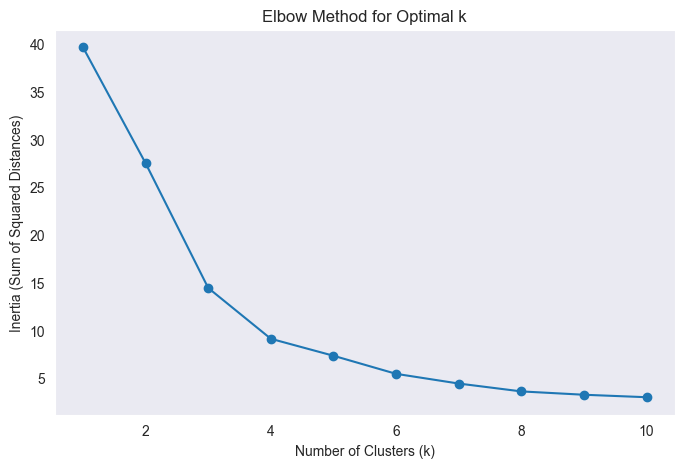

In [13]:
# Define range of clusters to try
range_n_clusters = range(1, 11)
inertia = []

# Fit KMeans for each k and store the inertia
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


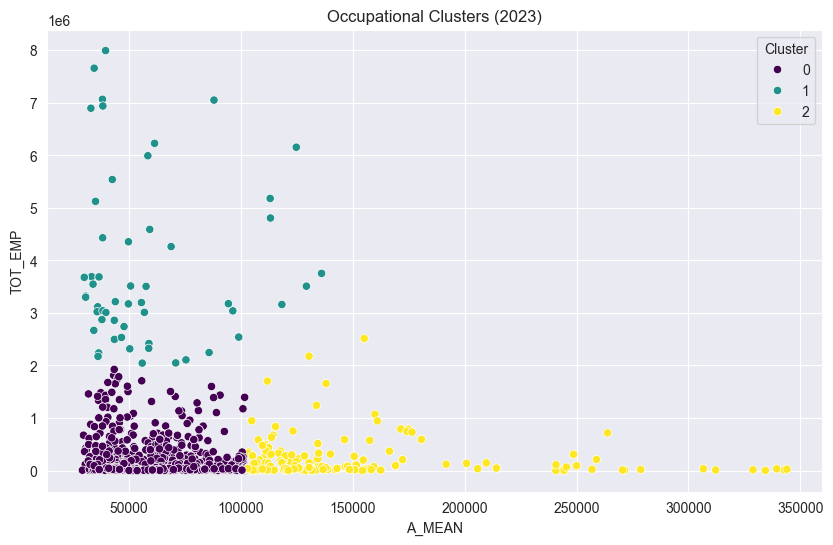

           TOT_EMP    A_MEAN
Cluster                     
0        198074.29  59810.25
1       3761835.40  57976.19
2        211254.33 145864.62


In [14]:
# Step 2: Apply K-Means Clustering
data_2023 = data_2023.copy()
kmeans = KMeans(n_clusters=3, random_state=42)
data_2023.loc[:, 'Cluster'] = kmeans.fit_predict(data_scaled)

# Step 3: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='A_MEAN', y='TOT_EMP', hue='Cluster', data=data_2023, palette='viridis')
plt.title('Occupational Clusters (2023)')
plt.show()
pd.options.display.float_format = '{:.2f}'.format
# Step 4: Summarize Clusters
cluster_summary = data_2023.groupby('Cluster')[['TOT_EMP', 'A_MEAN']].mean()
print(cluster_summary)


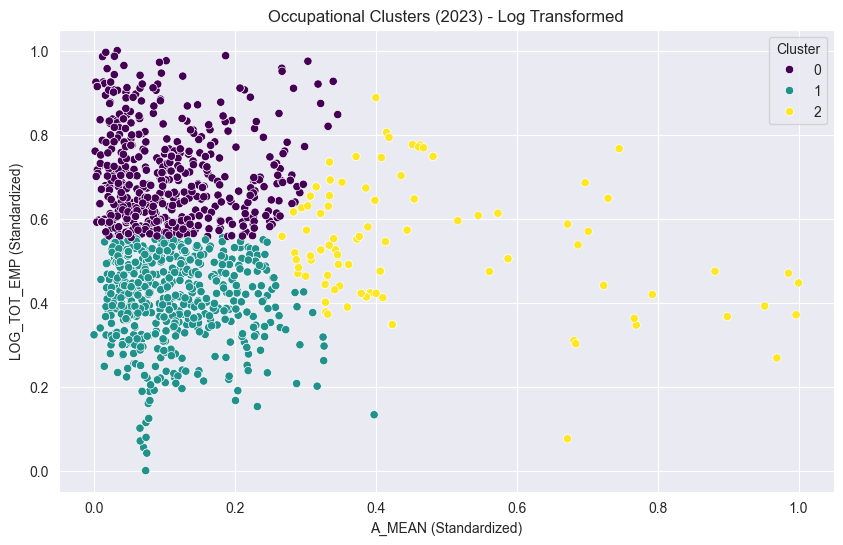

In [15]:
# Applying a logarithmic transformation can reduce the skewness and help in creating more circular clusters.
# Apply log transformation to reduce skewness
data_2023.loc[:, 'LOG_TOT_EMP'] = np.log1p(data_2023.loc[:, 'TOT_EMP'])  # log1p avoids log(0)

# Scale features after log transform
data_log_scaled = scaler.fit_transform(data_2023.loc[:, ['A_MEAN', 'LOG_TOT_EMP']])

# Reapply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data_2023.loc[:, 'Cluster'] = kmeans.fit_predict(data_log_scaled)

# Visualize again
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_log_scaled[:, 0], y=data_log_scaled[:, 1], hue=data_2023.loc[:, 'Cluster'], palette='viridis')
plt.title('Occupational Clusters (2023) - Log Transformed')
plt.xlabel('A_MEAN (Standardized)')
plt.ylabel('LOG_TOT_EMP (Standardized)')
plt.show()


In [19]:
data_2023

,OCC_CODE,OCC_TITLE,TOT_EMP,A_MEAN,Cluster,LOG_TOT_EMP
2,11-1000,Top Executives,3751510.00,136100.00,3,15.14
3,11-1010,Chief Executives,211230.00,258900.00,2,12.26
4,11-1011,Chief Executives,211230.00,258900.00,2,12.26
5,11-1020,General and Operations Managers,3507810.00,129330.00,3,15.07
6,11-1021,General and Operations Managers,3507810.00,129330.00,3,15.07
...,...,...,...,...,...,...
1398,53-7081,Refuse and Recyclable Material Collectors,135430.00,47810.00,3,11.82
1399,53-7120,"Tank Car, Truck, and Ship Loaders",11400.00,60530.00,1,9.34
1400,53-7121,"Tank Car, Truck, and Ship Loaders",11400.00,60530.00,1,9.34
1401,53-7190,Miscellaneous Material Moving Workers,23970.00,45840.00,1,10.08


In [20]:
# Top occupations by employment in each cluster
top_occupations = data_2023.groupby('Cluster').apply(
    lambda x: x.nlargest(5, 'TOT_EMP')[['OCC_TITLE', 'TOT_EMP']]
)
top_occupations

OCC_TITLE    TOT_EMP
Cluster                                                                   
0       18                      Operations Specialties Managers 2513900.00
        149                                 Software Developers 1656880.00
        334                                   Legal Occupations 1240630.00
        9     Advertising, Marketing, Promotions, Public Rel... 1070030.00
        12                         Marketing and Sales Managers  944820.00
1       129                                       Tax Preparers   81650.00
        908                               Postal Service Clerks   78130.00
        1075  Computer, Automated Teller, and Office Machine...   77580.00
        1076  Computer, Automated Teller, and Office Machine...   77580.00
        287                              Biological Technicians   76990.00
2       549                                          Physicians  716950.00
        562                               Physicians, All Other  310080.00
        3                                      Chief Executives  211230.00
        4                                      Chief Executives  211230.00
        1318               Aircraft Pilots and Flight Engineers  146420.00
3       1376                            Material Moving Workers 7989980.00
        796                                Retail Sales Workers 7655030.00
        610                      Healthcare Support Occupations 7063530.00
        75                      Business Operations Specialists 7048350.00
        1387                       Laborers and Material Movers 6935980.00

In [21]:
# Top occupations by employment in each cluster
top_salaried = data_2023.groupby('Cluster').apply(
    lambda x: x.nlargest(5, 'A_MEAN')[['OCC_TITLE', 'A_MEAN']]
)
top_salaried

OCC_TITLE    A_MEAN
Cluster                                                                 
0       513                                  Dentists, General 191750.00
        22           Computer and Information Systems Managers 180720.00
        23           Computer and Information Systems Managers 180720.00
        337                                            Lawyers 176470.00
        24                                  Financial Managers 174820.00
1       269            Industrial-Organizational Psychologists 154380.00
        281                               Political Scientists 132020.00
        581                               Medical Dosimetrists 131850.00
        543                                     Nurse Midwives 131570.00
        544                                     Nurse Midwives 131570.00
2       567                                Surgeons, All Other 343990.00
        552                                     Dermatologists 342860.00
        550                                  Anesthesiologists 339470.00
        514                    Oral and Maxillofacial Surgeons 334310.00
        468                    Athletes and Sports Competitors 328830.00
3       2                                       Top Executives 136100.00
        147  Software and Web Developers, Programmers, and ... 130500.00
        5                      General and Operations Managers 129330.00
        6                      General and Operations Managers 129330.00
        509    Healthcare Diagnosing or Treating Practitioners 124800.00

### 2023 Insight Analysis. <br>
#### Cluster 0: High Employment, Low to Mid Skill Roles.
##### Observation:
This cluster contains occupations with the highest employment numbers.
##### Job Nature: Primarily manual labor, retail, and healthcare support.
##### Top Occupations:
- Material Moving Workers
- Retail Sales Workers
- Healthcare Support Occupations
- Business Operations Specialists
- Laborers and Material Movers
##### Insight:
These jobs are critical for essential operations but are generally lower-paying and require fewer specialized skills. <br>


#### Cluster 1: Niche Roles with Lower Employment
##### Observation:
This cluster includes roles with significantly lower employment.
##### Job Nature: Technical, scientific, and specialized roles.
##### Top Occupations:
- Environmental Scientists and Specialists
- Postal Service Clerks
- Computer and Office Machine Repairers
- Biological Technicians
##### Insight:
These roles are more specialized and tend to involve higher skills, often found in smaller workforce segments.<br>


#### Cluster 2: Mid-to-High Employment, High-Skilled Jobs
##### Observation:
This cluster has moderate employment but involves high-skilled and managerial occupations.
##### Job Nature: Leadership, legal, and managerial roles.
##### Top Occupations:
- Operations Specialties Managers
- Advertising, Marketing, Promotions, Public Relations, and Sales Managers
- Lawyers, Judges, and Related Workers
- Financial Managers
##### Insight:
These jobs involve high levels of expertise, decision-making, and management responsibilities.


#### Cluster 0: High Employment, Low to Mid Skill Roles.
#### Cluster 1: Niche Roles with Lower Employment
#### Cluster 2: Mid-to-High Employment, High-Skilled Jobs


#### These insights show how occupations can be grouped based on factors such as salary, education requirements, and sector focus, which helps in understanding the types of jobs dominating the labor market across various industries in 2023.

In [22]:
# 2019
data_2019 = pd.read_csv('national_M2019_dl.csv')

In [23]:
columns_to_use = ['occ_code', 'occ_title', 'tot_emp', 'a_mean']
data_2019 = data_2019[columns_to_use][1:]
data_2019

,occ_code,occ_title,tot_emp,a_mean
1,11-0000,Management Occupations,"8,054,120","122,480"
2,11-1000,Top Executives,"2,658,440","127,070"
3,11-1010,Chief Executives,"205,890","193,850"
4,11-1011,Chief Executives,"205,890","193,850"
5,11-1020,General and Operations Managers,"2,400,280","123,030"
...,...,...,...,...
1324,53-7081,Refuse and Recyclable Material Collectors,"121,330","41,400"
1325,53-7120,"Tank Car, Truck, and Ship Loaders","11,620","47,580"
1326,53-7121,"Tank Car, Truck, and Ship Loaders","11,620","47,580"
1327,53-7190,Miscellaneous Material Moving Workers,"28,240","36,530"


In [24]:
pd.set_option('future.no_silent_downcasting', True)
# Remove commas and convert to float using pd.to_numeric
data_2019.loc[:, 'tot_emp'] = pd.to_numeric(data_2019['tot_emp'].replace({',': ''}, regex=True), errors='coerce')
data_2019.loc[:, 'a_mean'] = pd.to_numeric(data_2019['a_mean'].replace({',': ''}, regex=True), errors='coerce')
data_2019

,occ_code,occ_title,tot_emp,a_mean
1,11-0000,Management Occupations,8054120,122480.00
2,11-1000,Top Executives,2658440,127070.00
3,11-1010,Chief Executives,205890,193850.00
4,11-1011,Chief Executives,205890,193850.00
5,11-1020,General and Operations Managers,2400280,123030.00
...,...,...,...,...
1324,53-7081,Refuse and Recyclable Material Collectors,121330,41400.00
1325,53-7120,"Tank Car, Truck, and Ship Loaders",11620,47580.00
1326,53-7121,"Tank Car, Truck, and Ship Loaders",11620,47580.00
1327,53-7190,Miscellaneous Material Moving Workers,28240,36530.00


In [25]:
data_2019['tot_emp'] = data_2019['tot_emp'].astype(float)
data_2019['a_mean'] = data_2019['a_mean'].astype(float)
print(data_2019.dtypes)

occ_code      object
occ_title     object
tot_emp      float64
a_mean       float64
dtype: object


In [26]:
# Remove rows with NaN values
data_2019 = data_2019.dropna()
data_2019

,occ_code,occ_title,tot_emp,a_mean
1,11-0000,Management Occupations,8054120.00,122480.00
2,11-1000,Top Executives,2658440.00,127070.00
3,11-1010,Chief Executives,205890.00,193850.00
4,11-1011,Chief Executives,205890.00,193850.00
5,11-1020,General and Operations Managers,2400280.00,123030.00
...,...,...,...,...
1324,53-7081,Refuse and Recyclable Material Collectors,121330.00,41400.00
1325,53-7120,"Tank Car, Truck, and Ship Loaders",11620.00,47580.00
1326,53-7121,"Tank Car, Truck, and Ship Loaders",11620.00,47580.00
1327,53-7190,Miscellaneous Material Moving Workers,28240.00,36530.00


In [27]:
# Normalize the data
scaler = MinMaxScaler()
numerical_cols = ['tot_emp', 'a_mean']
data_scaled = scaler.fit_transform(data_2019[numerical_cols])
data_scaled

array([[4.12429480e-01, 4.16924881e-01],
       [1.36125960e-01, 4.36144377e-01],
       [1.05350805e-02, 7.15769199e-01],
       ...,
       [5.86846947e-04, 1.03299556e-01],
       [1.43792865e-03, 5.70303995e-02],
       [1.43792865e-03, 5.70303995e-02]])

In [28]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Calculate distances of each point to its assigned cluster center
distances = pairwise_distances_argmin_min(data_scaled, kmeans.cluster_centers_)[1]

# Define a threshold for outliers (e.g., top 1% of distances)
threshold = np.percentile(distances, 99)

# Remove points that are far from cluster centers
df_no_outliers = data_2019[distances <= threshold]

# Verify the results
print("Data size before removing outliers:", data_2019.shape)
print("Data size after removing outliers:", df_no_outliers.shape)


Data size before removing outliers: (1322, 4)
Data size after removing outliers: (1308, 4)


In [29]:
data_2019 = data_2019[distances <= threshold]

In [30]:
data_scaled = scaler.fit_transform(data_2019[numerical_cols])

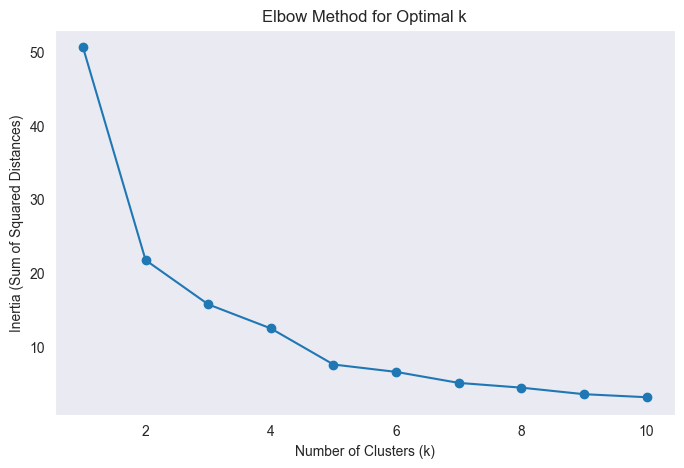

In [31]:
# Define range of clusters to try
range_n_clusters = range(1, 11)
inertia = []

# Fit KMeans for each k and store the inertia
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


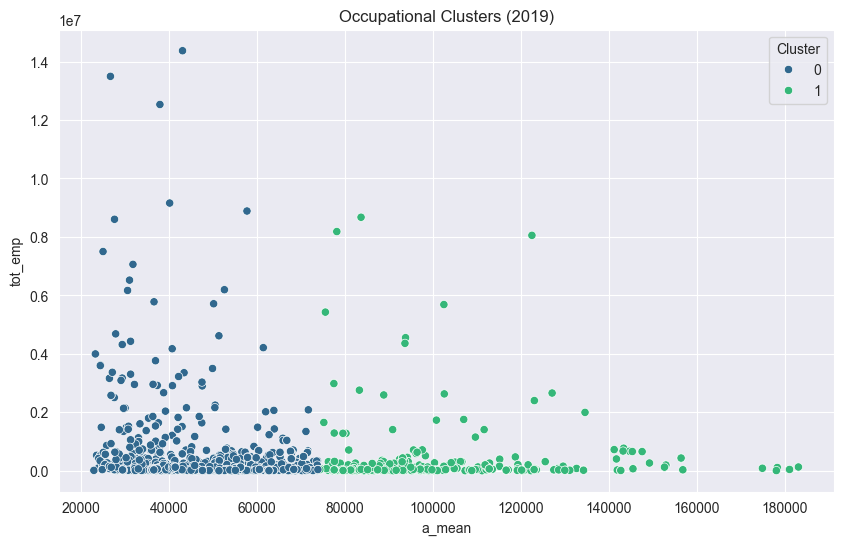

          tot_emp    a_mean
Cluster                    
0       445961.57  46534.90
1       373247.55 101790.65


In [32]:
# Step 2: Apply K-Means Clustering
data_2019 = data_2019.copy()
kmeans = KMeans(n_clusters=2, random_state=42)
data_2019.loc[:, 'Cluster'] = kmeans.fit_predict(data_scaled)

# Step 3: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='a_mean', y='tot_emp', hue='Cluster', data=data_2019, palette='viridis')
plt.title('Occupational Clusters (2019)')
plt.show()

# Step 4: Summarize Clusters
cluster_summary = data_2019.groupby('Cluster')[['tot_emp', 'a_mean']].mean()
print(cluster_summary)


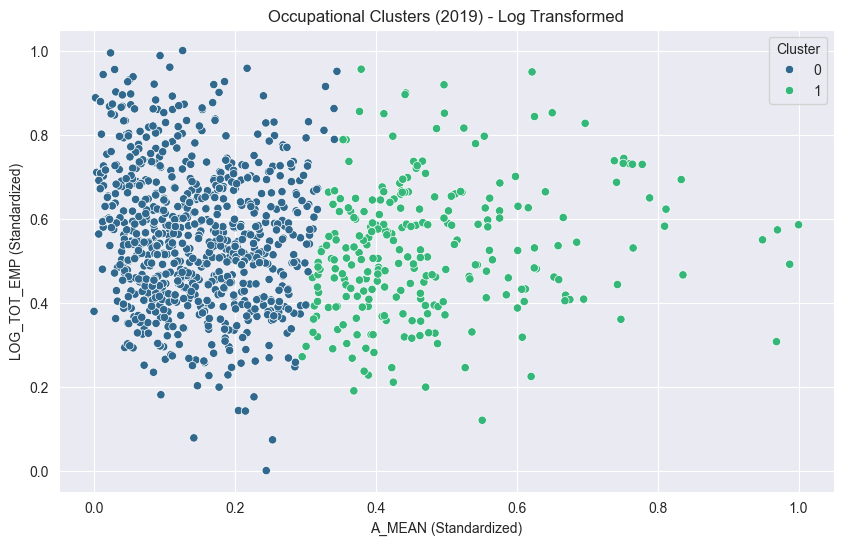

In [33]:
# Applying a logarithmic transformation can reduce the skewness and help in creating more circular clusters.
# Apply log transformation to reduce skewness
data_2019.loc[:, 'LOG_TOT_EMP'] = np.log1p(data_2019.loc[:, 'tot_emp'])  # log1p avoids log(0)

# Scale features after log transform
data_log_scaled = scaler.fit_transform(data_2019.loc[:, ['a_mean', 'LOG_TOT_EMP']])

# Reapply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
data_2019.loc[:, 'Cluster'] = kmeans.fit_predict(data_log_scaled)

# Visualize again
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_log_scaled[:, 0], y=data_log_scaled[:, 1], hue=data_2019.loc[:, 'Cluster'], palette='viridis')
plt.title('Occupational Clusters (2019) - Log Transformed')
plt.xlabel('A_MEAN (Standardized)')
plt.ylabel('LOG_TOT_EMP (Standardized)')
plt.show()


In [34]:
data_2019

,occ_code,occ_title,tot_emp,a_mean,Cluster,LOG_TOT_EMP
1,11-0000,Management Occupations,8054120.00,122480.00,1,15.90
2,11-1000,Top Executives,2658440.00,127070.00,1,14.79
5,11-1020,General and Operations Managers,2400280.00,123030.00,1,14.69
6,11-1021,General and Operations Managers,2400280.00,123030.00,1,14.69
7,11-1030,Legislators,52280.00,49440.00,0,10.86
...,...,...,...,...,...,...
1324,53-7081,Refuse and Recyclable Material Collectors,121330.00,41400.00,0,11.71
1325,53-7120,"Tank Car, Truck, and Ship Loaders",11620.00,47580.00,0,9.36
1326,53-7121,"Tank Car, Truck, and Ship Loaders",11620.00,47580.00,0,9.36
1327,53-7190,Miscellaneous Material Moving Workers,28240.00,36530.00,0,10.25


In [35]:
# Top occupations by employment in each cluster
top_occupations_2019 = data_2019.groupby('Cluster').apply(
    lambda x: x.nlargest(5, 'tot_emp')[['occ_title', 'tot_emp']]
)
top_occupations_2019

occ_title     tot_emp
Cluster                                                                     
0       728                        Sales and Related Occupations 14371410.00
        625     Food Preparation and Serving Related Occupations 13494590.00
        1243      Transportation and Material Moving Occupations 12532030.00
        1076                              Production Occupations  9158980.00
        325      Educational Instruction and Library Occupations  8886600.00
1       477   Healthcare Practitioners and Technical Occupations  8673140.00
        1                                 Management Occupations  8054120.00
        478      Healthcare Diagnosing or Treating Practitioners  5685500.00
        118                Computer and Mathematical Occupations  4552880.00
        119                                 Computer Occupations  4358410.00

In [37]:
# Top occupations by employment in each cluster
top_salaried_2019 = data_2019.groupby('Cluster').apply(
    lambda x: x.nlargest(5, 'a_mean')[['occ_title', 'a_mean']]
)
top_salaried_2019


occ_title    a_mean
Cluster                                                              
0       67    Business and Financial Operations Occupations  78130.00
        208  Life, Physical, and Social Science Occupations  77540.00
        508                               Registered Nurses  77460.00
        509                               Registered Nurses  77460.00
        68                  Business Operations Specialists  75530.00
1       481                                        Dentists 183060.00
        510                              Nurse Anesthetists 181040.00
        511                              Nurse Anesthetists 181040.00
        482                               Dentists, General 178260.00
        486                 Dentists, All Other Specialists 178040.00

### Key Insights from Clustering for 2019

### Workforce Concentration
* A significant portion of the workforce (Cluster 0) is concentrated in lower-paying, labor-intensive jobs.
* This highlights economic sectors that rely heavily on large-scale employment but offer limited wage growth.

### High-Skilled Roles
* Cluster 1 identifies specialized roles that are better compensated but employ a much smaller workforce.
* This suggests a divide in the labor market: occupations requiring advanced education or specialized skills offer higher salaries but fewer positions.

### Labor Market Implications
* Cluster 0 jobs may be vulnerable to automation or economic downturns due to their lower specialization.
* Cluster 1 jobs highlight opportunities for career growth and salary optimization through education, upskilling, and specialization.

From 2019 to 2023:

* The labor market has seen a shift away from purely manual roles towards mid-tier and specialized occupations.
* This highlights the growing importance of education, technical training, and adaptability to meet changing job demands.
* The emergence of mid-level roles creates opportunities for workers to transition from low-paying jobs into more stable, higher-paying roles with the right skills and training.
* This evolution reflects ongoing economic changes driven by technology, automation, and shifting workforce needs.

# Workforce Distribution and Job Demand Shifts: 2019-2023

## Workforce Distribution Across Clusters

**2019:**
* **Cluster 0:** High total employment, lower average salaries (manual labor, retail, support roles).
* **Cluster 1:** Low total employment, higher average salaries (specialized and managerial roles).

**2023:**
* **Cluster 0:** Remains largely unchanged, dominated by labor-intensive roles.
* **Cluster 1:** Continues to feature specialized, higher-paying jobs.
* **Cluster 2:** Emerges as a new cluster representing emerging mid-level roles that balance employment size and salary.

## Shifts in Job Demand

* **Manual Labor & Retail Roles (Cluster 0):**
  * While still dominant, their overall share might have shrunk.
  * Suggests potential impacts from automation, outsourcing, or reduced demand.
* **High-Skilled and Managerial Roles (Cluster 1):**
  * Retain high salaries but employ a smaller workforce.
  * Increased presence of technology-related roles indicates growing demand for digital skills.
* **Emerging Mid-Level Jobs (Cluster 2):**
  * The new cluster signifies a shift towards mid-salaried roles requiring a mix of skills.
  * Examples: Marketing Managers, Operations Specialists, Technical Repairers.

## Key Insights on Changes (2019 → 2023)

* **Diverse Job Distribution:** The 2023 workforce is more diverse, with a visible mid-level cluster.
* **Declining Manual Labor:** The dominance of low-paying, manual-intensive jobs is waning.
* **Sustained Demand for Specialized Skills:** Roles in technology, business management, and finance continue to be in high demand and command higher salaries.
* **Growth of Mid-Level Jobs:** The emergence of mid-tier occupations indicates a shift towards valuing moderate skills.